<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/cifar10_classification_functionalModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/cifar10_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [53]:
# Last amended: 16th Feb, 2021
# Myfolder: C:\Users\ashokharnal\OneDrive\Documents\deep_learning\cifar10 image classification
#           lubuntu_deeplearning-I
#	Objective:
#    i)  CIFAR10 image classification with deep-learning CNN
#    ii) Building Functional models
#       (Use GPU not CPU)

In [55]:
# 1.1 Import array-manipulation library
import numpy as np

# 1.2 Import tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [56]:
# 1.3 Import keras subroutines for fetching the CIFAR-10 dataset
#     The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes,
#      with 6000 images per class. There are 50000 training images and 10000
#       test images.  They were collected by Alex Krizhevsky, Vinod Nair, and
#         Geoffrey Hinton. Classes are: airplane, automobile, bird, cat, deer,
#          dog, frog, horse, ship, truck
#            (CIFAR: Canadian Institute For Advanced Research) 

from keras.datasets import cifar10


In [57]:
# 1.4 Basic classes for specifying and training a neural network
#     Keras has two types of models Sequential and Model Class for complex models
#     Sequential models are essentially layer-by-layer. Model Class models may
#     also have branching.

from keras.models import Sequential, Model
from keras.utils import plot_model

In [58]:
# 1.5 Import layers that will be used in modeling
#     For Sequential modeling concatenation layer
#     is "Concatenate" and for functional modeling, it
#     is "concatenate"
from keras.layers import Input,Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate,BatchNormalization, Activation


In [59]:
# 1.6 Keras utilities for one-hot encoding of ground truth values
from keras.utils import np_utils

In [61]:
# 1.7 Import keras optimizers unless you want default parameters
# from keras.optimizers import Adam

# 1.8
import os, time
import matplotlib.pyplot as plt
# %matplotlib inline


In [62]:
# 1.9 Display outputs from multiple commands in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
#%%                                 B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 16   # A batch of 'batch_size' training examples is fed before 
                  #  every error correction  
# 2.2
num_epochs = 50   # Over the entire training set, we iterate 5 times 
                  # Thus per epoch, there will be (X_train.shape[0]/batch_size) batches

In [63]:
#%%                     C. Fetch cifar10 images & transform
"""
About CIFAR-10 images
Ref: https://en.wikipedia.org/wiki/CIFAR-10
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a
collection of images that are commonly used to train machine learning
and computer vision algorithms. It is one of the most widely used datasets
for machine learning research. The CIFAR-10 dataset contains 60,000 32x32
color images in 10 different classes. The 10 different classes represent
airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
There are 6,000 images of each class. (Alex Krizhevsky)
"""

'\nAbout CIFAR-10 images\nRef: https://en.wikipedia.org/wiki/CIFAR-10\nThe CIFAR-10 dataset (Canadian Institute For Advanced Research) is a\ncollection of images that are commonly used to train machine learning\nand computer vision algorithms. It is one of the most widely used datasets\nfor machine learning research. The CIFAR-10 dataset contains 60,000 32x32\ncolor images in 10 different classes. The 10 different classes represent\nairplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.\nThere are 6,000 images of each class. (Alex Krizhevsky)\n'

In [64]:
#  3. Download, unzip and divide into training/test data cifar10 images
#      By default download occurs at C:\Users\ashokharnal\.keras\datasets\
#      Or at /home/ashok/.keras/datasets ;  Downloaded file: cifar-10-batches-py.tar.gz.
#       Expanded in folder: cifar-10-batches-py
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape              # (50000, 32, 32, 3):50000 images, 32 X 32 pixels, 3-channels
y_train.shape              # (50000, 1)

(50000, 32, 32, 3)

(50000, 1)

In [65]:
# 3.1 Have a look at the data
X_train[0,:3, :3,0]  # Pixel intensity values in the  
                     #  slice of 3X3 from Ist image
                     #   and Ist channel         
y_train[:10,:]

array([[59, 43, 50],
       [16,  0, 18],
       [25, 16, 49]], dtype=uint8)

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [66]:
# 3.2 Let us check min and max values
#     of pixel intensities
print(X_train.min())      # 0
print(X_train.max())      # 255

0
255


In [67]:
# 4. There are 50000 training examples in CIFAR-10
num_train, height, width, depth = X_train.shape

In [68]:
# 4.1 There are 10000 test examples in CIFAR-10
num_test = X_test.shape
print(num_test)

(10000, 32, 32, 3)


In [69]:
# 4.2.1 Class names are in alphabetical sequence
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
# 4.2.2 There are 10 image classes
num_classes = np.unique(y_train).shape[0]
num_classes
class_names = ["airplane","automobile","bird",
               "cat","deer","dog","frog","horse",
               "ship","truck"]

10

In [71]:
# 5. See one image
i = 1
im1 = X_train[i]    # Get the ith image array

# 5.1 To which class does it belong
y_train[i]
k = class_names[y_train[i][0]]           # Get 0th element of y_train[1]
print(k)

array([9], dtype=uint8)

truck


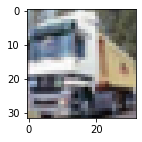

In [72]:
# 5.2 Plot the image
fig = plt.figure(figsize=(4,2))
plt.imshow(im1)                         # imshow() is a matplotlib method
plt.show()

In [73]:
# 6.0 Normalise train data
X_tr = X_train.reshape(50000,-1)
mean = np.mean(X_tr,axis = 0)
std = np.std(X_tr,axis = 0)
X_tr = (X_tr - mean )/std
X_tr[0,:5]
X_tr = X_tr.reshape(50000,32,32,3)

array([-0.97682401, -1.01575822, -0.86457067, -1.20290054, -1.24397271])

In [74]:
# 6.1
X_te = X_test.reshape(10000,-1)
X_te = (X_te - mean)/std
X_te[0,:5]
X_te = X_te.reshape(10000,32,32,3)

array([ 0.37172681, -0.32995538, -1.03859408,  0.39838344, -0.33994683])

In [75]:
# 6.2 Transform y_train and y_test to OHE
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_train[2:5, :]
y_train[2:5]
Y_test = np_utils.to_categorical(y_test, num_classes)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

array([[9],
       [4],
       [1]], dtype=uint8)

### Design NN using Functional modeling

In [ ]:
# Rule for concatenation of layers from two arms:
#     For concatenation, the two layers must have same widths and heights but number
#     of filters can be different. Thus, 32 X 32 X 64 and 32 X 32 X 32 would concatenate
# How to change (width X height) of a layer:
#   1  Formula (with stride 1) is: (W -F + 2 *P) + 1 = W - (F-1) where F is kernel-size
#   2. Therefore, kernel-size of 2 X 2, stride =1, padding = 0, reduces outshape by 1 X 1
#      ie 32 X 32 reduces to 31 X 31
#   3. Thus, if you want the outshape to reduce by m X m, take kernel-size of m+1 


In [76]:
# 7.0 Inputs
xy = Input(shape = (32,32,3))

In [77]:
# 7.1 Left portion of layer
x_l = Convolution2D(filters = 32,kernel_size = 2)(xy)
x_l = BatchNormalization()(x_l)
x_l = Activation('selu')(x_l)
x_l = Convolution2D(filters = 64,kernel_size = 2, padding='same')(x_l)
x_l = BatchNormalization()(x_l)
x_l = Activation('selu')(x_l)
x_l = MaxPooling2D()(x_l)
x_l = Convolution2D(filters=64,kernel_size=2)(x_l)
x_l = BatchNormalization()(x_l)
x_l = Activation('selu')(x_l)
x_l = Convolution2D(filters=64,kernel_size=2)(x_l)
x_l = BatchNormalization()(x_l)
x_l = Activation('selu')(x_l)

# 7.2 Check last layer's sizes
#ml = Model(inputs= xy, outputs =x_l)
#ml.summary()

In [78]:
# 7.3 Right portion of our CNN
x_r = Convolution2D(filters = 32,kernel_size = 2)(xy)
x_r = BatchNormalization()(x_r)
x_r = Activation('selu')(x_r)
x_r = Convolution2D(filters = 64,kernel_size = 2)(x_r)
x_r = BatchNormalization()(x_r)
x_r = Activation('selu')(x_r)
x_r = Convolution2D(filters = 32,kernel_size = 2)(x_r)
x_r = BatchNormalization()(x_r)
x_r = Activation('selu')(x_r)
x_r = MaxPooling2D()(x_r)
x_r = Convolution2D(filters=128,kernel_size=2)(x_r)
x_r = BatchNormalization()(x_r)
x_r = Activation('selu')(x_r)
# 7.4 Check last layer sizes before concatenation
#mr = Model(inputs= xy, outputs =x_r)
#mr.summary()

In [81]:
# 7.5 Concatenate now
#     For Sequential modeling concatenation layer
#     is "Concatenate" and for functional modeling, it
#     is "concatenate"
x_f = concatenate([x_l,x_r])

In [82]:
# 7.6 Flatten it:
x_f = Flatten()(x_f)
x_f = Dense(512,activation='relu')(x_f)
x_f = Dropout(0.5)(x_f)
# 8.0 Perform classification
x_f = Dense(num_classes,activation='softmax')(x_f)

In [83]:
# 8.0 Our model
model = Model(inputs = [xy], outputs = [x_f])

In [84]:
# 8.1 Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 31, 31, 32)   416         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 31, 31, 32)   416         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 31, 31, 32)   128         conv2d_8[0][0]                   
____________________________________________________________________________________________

In [85]:
# 8.2 Compile model
model.compile(
              loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = "accuracy"
              )

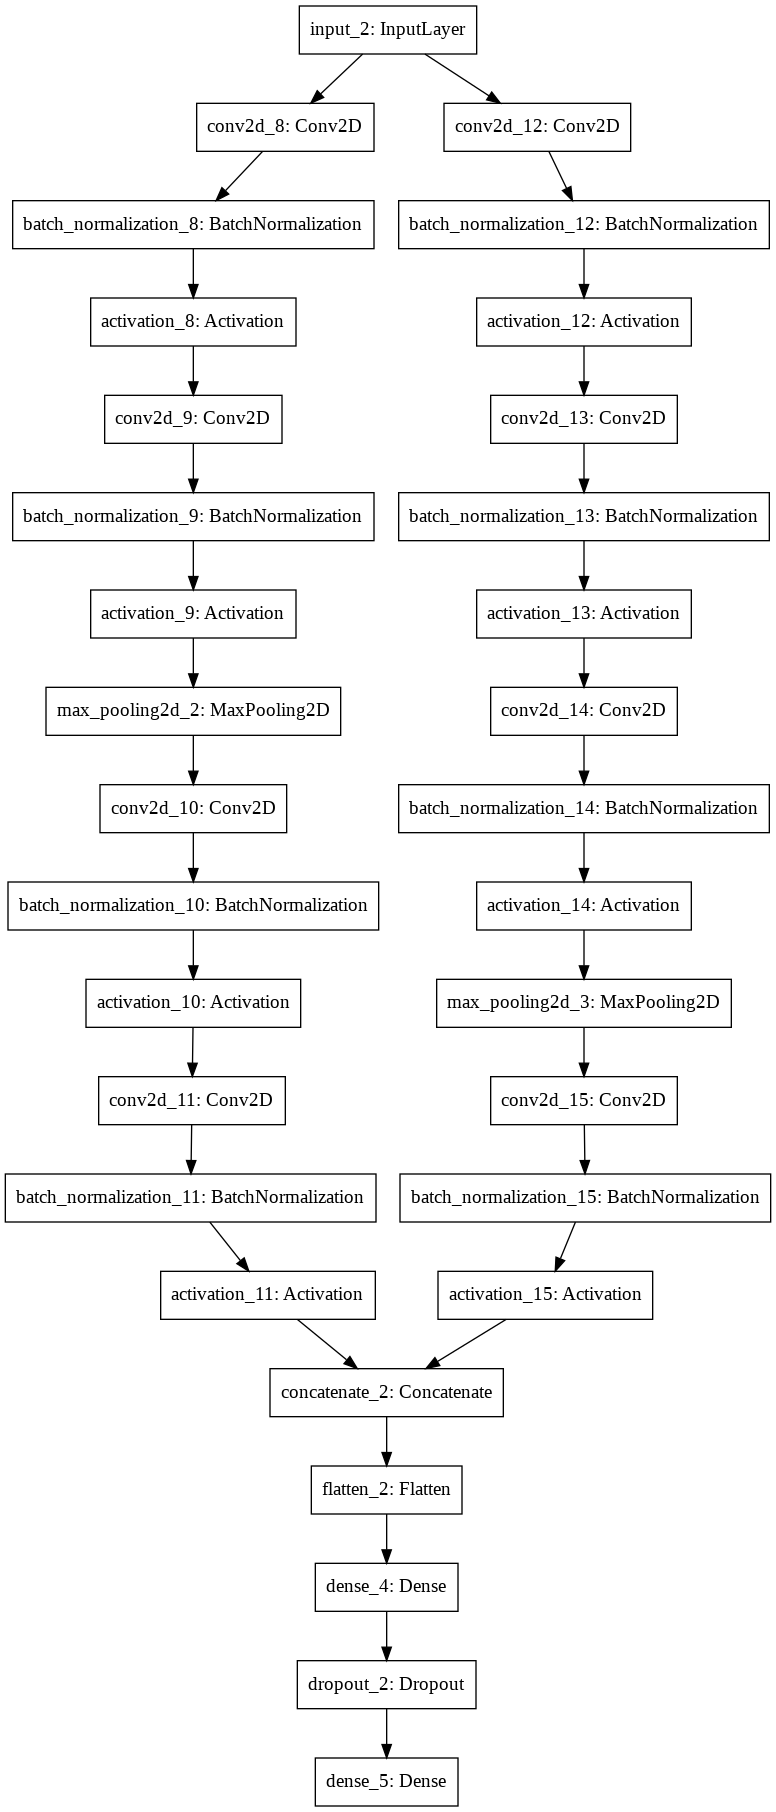

In [86]:
# 8.3 Plot model
plot_model(model)

In [87]:
# 9.0 For saving checkpoint weights
#     But this does not work
#     Model weights should be saved in current VM
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# 9.1 Save model weights
# Callbacks: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
"""
Syntax: 
tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None, **kwargs
)
"""
# Unable to save weights in mounted drive
filepath = "/content/drive/MyDrive/Colab_data_files"

# 9.2
cb=tf.keras.callbacks.ModelCheckpoint(
                                        filepath = filepath,
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        save_weights_only=True,  # Do not save the whole model
                                        mode='max',   # Save 'max' accuracy weights
                                        save_freq='epoch'
                                      )

"\nSyntax: \ntf.keras.callbacks.ModelCheckpoint(\n    filepath, monitor='val_loss', verbose=0, save_best_only=False,\n    save_weights_only=False, mode='auto', save_freq='epoch',\n    options=None, **kwargs\n)\n"

In [89]:
# 9.3 Train the model
history = model.fit(
                    X_tr,
                    Y_train,
                    epochs = 100,
                    batch_size= batch_size,
                    validation_split = 0.1,
                    callbacks = [cb]

                   )

Epoch 1/100
2813/2813 [==============================] - 29s 10ms/step - loss: 6.2284 - accuracy: 0.3234 - val_loss: 1.3901 - val_accuracy: 0.5032
Epoch 2/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.6068 - accuracy: 0.4500 - val_loss: 1.4206 - val_accuracy: 0.5526
Epoch 3/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.4838 - accuracy: 0.4964 - val_loss: 1.1921 - val_accuracy: 0.5970
Epoch 4/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.3490 - accuracy: 0.5454 - val_loss: 1.0955 - val_accuracy: 0.6356
Epoch 5/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.2197 - accuracy: 0.5861 - val_loss: 1.0323 - val_accuracy: 0.6548
Epoch 6/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.1112 - accuracy: 0.6216 - val_loss: 0.9307 - val_accuracy: 0.6896
Epoch 7/100
2813/2813 [==============================] - 28s 10ms/step - loss: 1.0414 - accuracy: 0.6395 - val_loss: 0

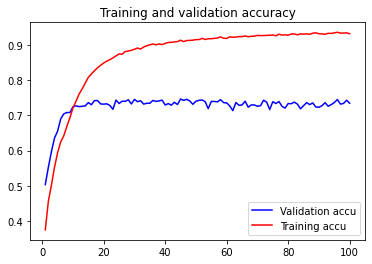

In [90]:
# 10.0 How accuracy changes as epochs increase
#     We will use this function again and again
#     in subsequent examples

def plot_history():
    val_acc = history.history['val_accuracy']
    tr_acc=history.history['accuracy']
    epochs = range(1, len(val_acc) +1)
    plt.plot(epochs,val_acc, 'b', label = "Validation accu")
    plt.plot(epochs, tr_acc, 'r', label = "Training accu")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [91]:
# 10.1 Evaluate the trained model on the test set!
#      Returns the loss value & metrics values for
#      the model in test mode.
model.evaluate(X_te, Y_test, verbose=1)      # Accuracy is just 10%

''

313/313 [==============================] - 1s 4ms/step - loss: 2.0522 - accuracy: 0.7326


[2.052213430404663, 0.7325999736785889]

In [92]:
# 10.2 Make predictions
#      Generates output predictions for the input samples.
y_pred = model.predict(X_te)
y_pred[0]

array([3.6737047e-23, 8.2762216e-18, 5.6560731e-17, 1.0000000e+00,
       5.0759437e-21, 1.1807216e-12, 2.4735163e-09, 2.2293685e-25,
       9.5485015e-18, 3.8399888e-17], dtype=float32)

In [93]:
# 10.3 Prob to integer
ypred = np.argmax(y_pred, axis = 1)
print(ypred)
print("---")
y_test[:4]

[3 8 8 ... 5 1 7]
---


array([[3],
       [8],
       [8],
       [0]], dtype=uint8)

In [49]:
# 10.4 Accuracy
np.sum(ypred == y_test.flatten())/10000

0.7094

In [ ]:
###################### END##
# 11. Softmax calulations
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  # A list of exponential values
sum_z_exp = sum(z_exp)     
sum_z_exp                   # A constant
softmax = [i / sum_z_exp for i in z_exp]
softmax
sum(softmax)

# 11.1 Plot histogram
fig,ax = plt.subplots(nrows=2,ncols =1)
ax[0].bar(range(7),z)
ax[1].bar(range(7),softmax)
plt.show()
############################

## Using tensorboard

In [98]:
# 12.0
! ls /root
!rm -rf /root/logs/
!mkdir /root/logs/
log_dir = "/root/logs/"

logs


In [99]:
# 12.1 Start tensorboard server
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [100]:
# 12.2 Create callback to save data in a folder
callbacks = tf.keras.callbacks.TensorBoard(log_dir = log_dir )

In [ ]:
# 12.3 Begin training
start = time.time()
history = model.fit(X_train[:25000],       # Train model using limited training data
                    Y_train[:25000],
                    batch_size=batch_size, # Total batches: (25000 - 2500)/16 = 1407
                    epochs=num_epochs,
                    verbose=1,
                    callbacks = callbacks,
                    validation_split=0.1   # 2500
                    )
end = time.time()
print ((end - start)/60)

In [ ]:
!ls /root/logs

In [ ]:
%tensorboard --logdir /root/logs

In [ ]:
############